=== РЕЗУЛЬТАТЫ СИНЕГО УРОВНЯ ===

Реальная конверсия: 18.0%
Вероятность внедрения (подход A): 11.7%
Вероятность внедрения (подход B): 0.7%

Реальная конверсия: 20.0%
Вероятность внедрения (подход A): 32.1%
Вероятность внедрения (подход B): 20.2%

Реальная конверсия: 22.0%
Вероятность внедрения (подход A): 59.3%
Вероятность внедрения (подход B): 76.1%


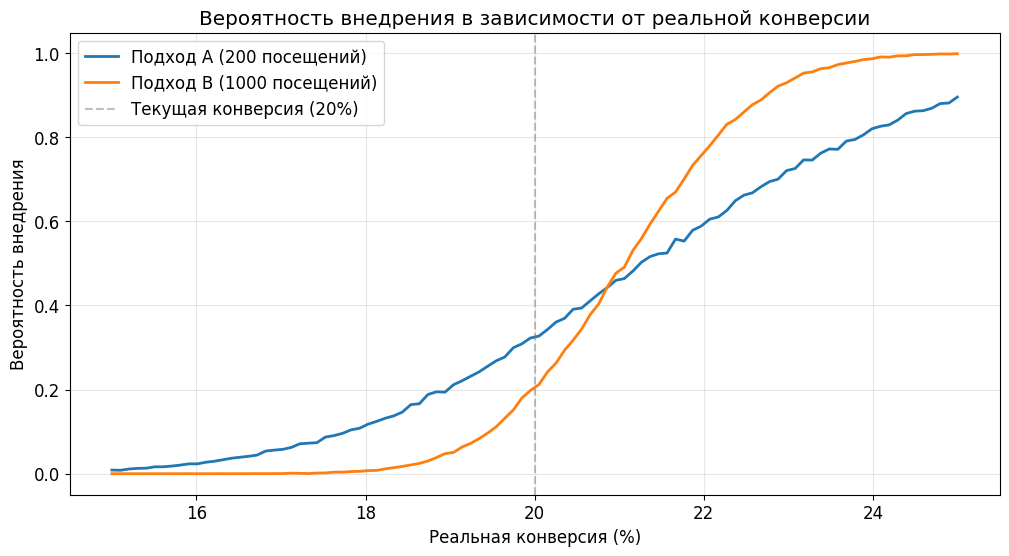


=== РЕЗУЛЬТАТЫ КРАСНОГО УРОВНЯ ===

Реальная конверсия: 18.0%
Вероятность внедрения (подход C): 1.1%

Реальная конверсия: 20.0%
Вероятность внедрения (подход C): 21.5%

Реальная конверсия: 22.0%
Вероятность внедрения (подход C): 65.9%


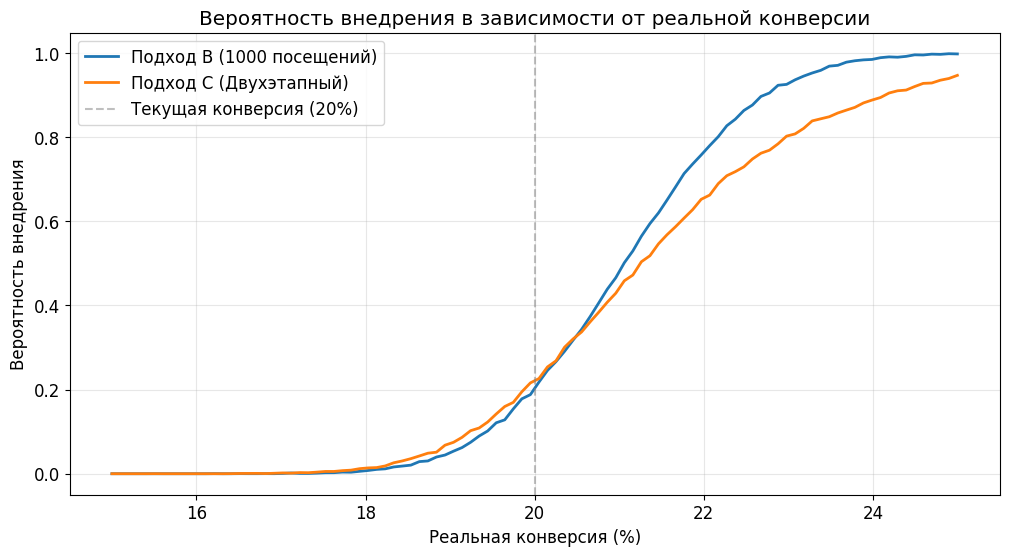


=== РЕЗУЛЬТАТЫ ЧЕРНОГО УРОВНЯ ===

Реальная конверсия: 18.0%
Вероятность внедрения (подход D): 2.0%

Реальная конверсия: 20.0%
Вероятность внедрения (подход D): 17.4%

Реальная конверсия: 22.0%
Вероятность внедрения (подход D): 47.8%


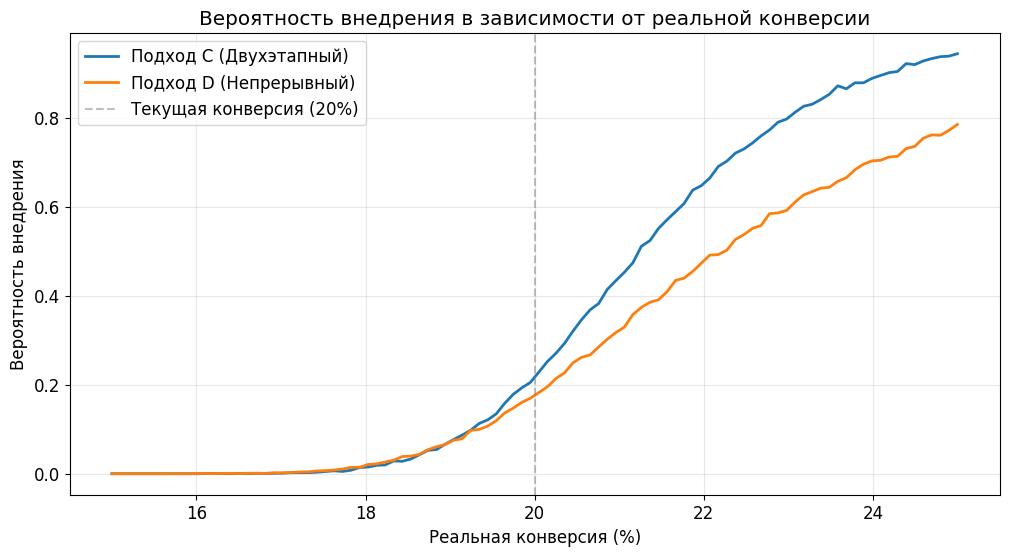

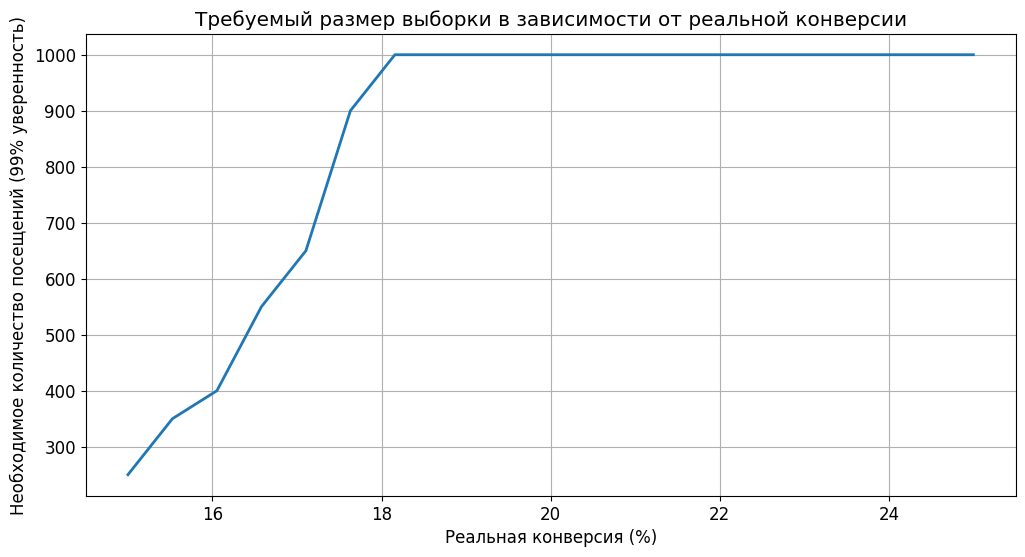

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import List, Tuple, Callable
import pandas as pd

# Общие утилиты для всех уровней
class ConversionAnalysis:
    def __init__(self, seed: int = 42):
        """Инициализация анализа с опциональным семенем для воспроизводимости результатов"""
        np.random.seed(seed)
        self.setup_plot_style()
        
    def setup_plot_style(self):
        """Настройка стиля графиков"""
        plt.rcParams['figure.figsize'] = (12, 6)
        plt.rcParams['font.size'] = 12
        
    def simulate_conversions(self, true_rate: float, n_visits: int, 
                           n_simulations: int = 10000) -> np.ndarray:
        """
        Симулирует результаты конверсии для заданных параметров
        
        Параметры:
        true_rate: Реальная конверсия дизайна
        n_visits: Количество посещений
        n_simulations: Количество симуляций
        """
        return np.random.binomial(n=n_visits, p=true_rate, size=n_simulations)
    
    def calculate_implementation_probability(self, true_rate: float, n_visits: int, 
                                          threshold: float, n_simulations: int = 10000) -> float:
        """
        Рассчитывает вероятность внедрения дизайна на основе порога конверсии
        
        Параметры:
        true_rate: Реальная конверсия дизайна
        n_visits: Количество посещений для теста
        threshold: Минимальная требуемая конверсия
        n_simulations: Количество симуляций
        """
        conversions = self.simulate_conversions(true_rate, n_visits, n_simulations)
        observed_rates = conversions / n_visits
        return np.mean(observed_rates > threshold)

# ============= СИНИЙ УРОВЕНЬ =============
class BlueLevelAnalysis:
    """Реализация задач синего уровня"""
    
    def __init__(self):
        self.analysis = ConversionAnalysis()
    
    def task_1_approach_a(self, true_rate: float) -> float:
        """
        Задача 1: Анализ подхода A (200 посещений)
        Возвращает вероятность внедрения при заданной реальной конверсии
        """
        return self.analysis.calculate_implementation_probability(
            true_rate=true_rate,
            n_visits=200,
            threshold=0.21
        )
    
    def task_2_approach_b(self, true_rate: float) -> float:
        """
        Задача 2: Анализ подхода B (1000 посещений)
        Возвращает вероятность внедрения при заданной реальной конверсии
        """
        return self.analysis.calculate_implementation_probability(
            true_rate=true_rate,
            n_visits=1000,
            threshold=0.21
        )
    
    def task_3_comparison_plot(self):
        """
        Задача 3: Сравнение подходов A и B
        Создает график сравнения вероятностей внедрения
        """
        true_rates = np.linspace(0.15, 0.25, 100)
        
        plt.figure(figsize=(12, 6))
        
        # График подхода A
        probs_a = [self.task_1_approach_a(rate) for rate in true_rates]
        plt.plot(true_rates * 100, probs_a, label='Подход A (200 посещений)', linewidth=2)
        
        # График подхода B
        probs_b = [self.task_2_approach_b(rate) for rate in true_rates]
        plt.plot(true_rates * 100, probs_b, label='Подход B (1000 посещений)', linewidth=2)
        
        self._add_plot_decorations()
        return plt.gcf()
    
    def _add_plot_decorations(self):
        """Добавляет оформление к графику"""
        plt.axvline(x=20, color='gray', linestyle='--', alpha=0.5, label='Текущая конверсия (20%)')
        plt.grid(True, alpha=0.3)
        plt.xlabel('Реальная конверсия (%)')
        plt.ylabel('Вероятность внедрения')
        plt.legend()
        plt.title('Вероятность внедрения в зависимости от реальной конверсии')

# ============= КРАСНЫЙ УРОВЕНЬ =============
class RedLevelAnalysis:
    """Реализация задач красного уровня"""
    
    def __init__(self):
        self.analysis = ConversionAnalysis()
        self.blue_level = BlueLevelAnalysis()
    
    def two_stage_probability(self, true_rate: float, n_visits1: int = 200, 
                            n_visits2: int = 800, threshold: float = 0.20) -> float:
        """
        Реализует двухэтапный подход C
        
        Параметры:
        true_rate: Реальная конверсия
        n_visits1: Количество посещений на первом этапе
        n_visits2: Количество посещений на втором этапе
        threshold: Пороговая конверсия
        """
        stage1_conversions = self.analysis.simulate_conversions(true_rate, n_visits1)
        stage1_rates = stage1_conversions / n_visits1
        passed_stage1 = stage1_rates > threshold
        
        stage2_conversions = self.analysis.simulate_conversions(true_rate, n_visits2)
        stage2_rates = stage2_conversions / n_visits2
        passed_stage2 = stage2_rates > threshold
        
        return np.mean(passed_stage1 & passed_stage2)
    
    def task_1_approach_c(self, true_rate: float) -> float:
        """Задача 1: Анализ двухэтапного подхода C"""
        return self.two_stage_probability(true_rate)
    
    def task_2_comparison_plot(self):
        """Задача 2: Сравнение подходов B и C"""
        true_rates = np.linspace(0.15, 0.25, 100)
        
        plt.figure(figsize=(12, 6))
        
        # График подхода B
        probs_b = [self.blue_level.task_2_approach_b(rate) for rate in true_rates]
        plt.plot(true_rates * 100, probs_b, label='Подход B (1000 посещений)', linewidth=2)
        
        # График подхода C
        probs_c = [self.task_1_approach_c(rate) for rate in true_rates]
        plt.plot(true_rates * 100, probs_c, label='Подход C (Двухэтапный)', linewidth=2)
        
        self.blue_level._add_plot_decorations()
        return plt.gcf()

# ============= ЧЕРНЫЙ УРОВЕНЬ =============
class BlackLevelAnalysis:
    """Реализация задач черного уровня"""
    
    def __init__(self):
        self.analysis = ConversionAnalysis()
        self.red_level = RedLevelAnalysis()
    
    def continuous_implementation_probability(self, true_rate: float, initial_visits: int = 200,
                                           max_visits: int = 1000, threshold: float = 0.196, 
                                           step_size: int = 50) -> float:
        """
        Реализует подход непрерывного мониторинга D
        
        Параметры:
        true_rate: Реальная конверсия
        initial_visits: Начальное количество посещений
        max_visits: Максимальное количество посещений
        threshold: Пороговая конверсия
        step_size: Размер шага проверки
        """
        results = np.zeros(10000, dtype=bool)
        
        for sim in range(10000):
            total_conversions = 0
            current_visits = 0
            continue_testing = True
            
            while continue_testing and current_visits < max_visits:
                new_visits = min(step_size, max_visits - current_visits)
                new_conversions = np.random.binomial(n=new_visits, p=true_rate)
                
                total_conversions += new_conversions
                current_visits += new_visits
                
                current_rate = total_conversions / current_visits
                
                if current_rate < threshold:
                    continue_testing = False
                elif current_visits >= max_visits:
                    results[sim] = True
                    
        return np.mean(results)
    
    def task_1_approach_d(self, true_rate: float) -> float:
        """Задача 1: Анализ подхода непрерывного мониторинга D"""
        return self.continuous_implementation_probability(true_rate)
    
    def task_2_comparison_plot(self):
        """Задача 2: Сравнение подходов C и D"""
        true_rates = np.linspace(0.15, 0.25, 100)
        
        plt.figure(figsize=(12, 6))
        
        # График подхода C
        probs_c = [self.red_level.task_1_approach_c(rate) for rate in true_rates]
        plt.plot(true_rates * 100, probs_c, label='Подход C (Двухэтапный)', linewidth=2)
        
        # График подхода D
        probs_d = [self.task_1_approach_d(rate) for rate in true_rates]
        plt.plot(true_rates * 100, probs_d, label='Подход D (Непрерывный)', linewidth=2)
        
        self.red_level.blue_level._add_plot_decorations()
        return plt.gcf()
    
    def task_3_threshold_analysis(self):
        """
        Задача 3: Анализ порогов для разных конверсий
        Создает график зависимости необходимого количества посещений от реальной конверсии
        """
        true_rates = np.linspace(0.15, 0.25, 20)
        thresholds = []
        
        for rate in true_rates:
            visits = []
            for n in range(200, 1001, 50):
                prob = self.continuous_implementation_probability(rate, max_visits=n)
                if prob < 0.01:  # 99% уверенность
                    visits.append(n)
                    break
            if visits:
                thresholds.append(min(visits))
            else:
                thresholds.append(1000)
        
        plt.figure(figsize=(12, 6))
        plt.plot(true_rates * 100, thresholds, linewidth=2)
        plt.xlabel('Реальная конверсия (%)')
        plt.ylabel('Необходимое количество посещений (99% уверенность)')
        plt.title('Требуемый размер выборки в зависимости от реальной конверсии')
        plt.grid(True)
        return plt.gcf()

def main():
    """Основная функция для запуска анализа всех уровней"""
    # Создаем объекты анализа для каждого уровня
    blue = BlueLevelAnalysis()
    red = RedLevelAnalysis()
    black = BlackLevelAnalysis()
    
    # Тестовые конверсии для оценки
    test_rates = [0.18, 0.20, 0.22]
    
    # Результаты синего уровня
    print("=== РЕЗУЛЬТАТЫ СИНЕГО УРОВНЯ ===")
    for rate in test_rates:
        print(f"\nРеальная конверсия: {rate*100}%")
        print(f"Вероятность внедрения (подход A): {blue.task_1_approach_a(rate)*100:.1f}%")
        print(f"Вероятность внедрения (подход B): {blue.task_2_approach_b(rate)*100:.1f}%")
    blue.task_3_comparison_plot()
    plt.show()
    
    # Результаты красного уровня
    print("\n=== РЕЗУЛЬТАТЫ КРАСНОГО УРОВНЯ ===")
    for rate in test_rates:
        print(f"\nРеальная конверсия: {rate*100}%")
        print(f"Вероятность внедрения (подход C): {red.task_1_approach_c(rate)*100:.1f}%")
    red.task_2_comparison_plot()
    plt.show()
    
    # Результаты черного уровня
    print("\n=== РЕЗУЛЬТАТЫ ЧЕРНОГО УРОВНЯ ===")
    for rate in test_rates:
        print(f"\nРеальная конверсия: {rate*100}%")
        print(f"Вероятность внедрения (подход D): {black.task_1_approach_d(rate)*100:.1f}%")
    black.task_2_comparison_plot()
    plt.show()
    black.task_3_threshold_analysis()
    plt.show()

if __name__ == "__main__":
    main()

# PRESENTATION
https://docs.google.com/presentation/d/157xMr9cBzrWR2bD5eT9KGAw1CdRv6r-leh4Q6mhb60U/edit?usp=sharing